In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Nadam,Adamax
from tensorflow.keras.layers import Dense,Dropout
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import itertools as it
from numpy import argmax
from numpy import sqrt
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the Data from our local hardware

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DNN_Task/churn.csv')

In [ ]:
#!pip install matplotlib

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Statistical Summary of the data

In [ ]:
# describe method is used to view some basic statistical details like percentile, mean, std etc. of a data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The describe function returns a pandas series type that provides descriptive statistics which summarize the **central tendency**, **dispersion**, and shape of a dataset’s distribution, excluding NaN values. The three main numerical measures for the center of a distribution are the mode, **mean(µ)**, and the **median (M)**. The **mode** is the most frequently occurring value. The mean is the average value, while the median is the middle value.

In [ ]:
# info function gives us the information about the data and the datatype of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We observe that there are 10000 records and 14 columns in the dataset. Train dataset has Surname, Geography , Gender as **object** types. **Object** type in pandas is similar to strings.RowNumber,CustomerId,CreditScore, Age , Tenure,NumOfProducts,HasCrCard,IsActiveMember  is of  **integer** type. The other two fields namely float64 and EstimatedSalary are **floating** point types.

## Shape of the Data

In [ ]:
data.shape

(10000, 14)

**Surname**, **CustomerId** and **RowNumber**  features are unique and these features has nothing to do wether the custome will exit or not because customer_id and Surname for each customer is different and finding a pattern in these two feature as compared to other feature is impossible so we will drop these features.Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove **Surname**, **CustomerId** and **RowNumber** features.

In [ ]:
data_new=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checked whether the dataset is balanced or not 

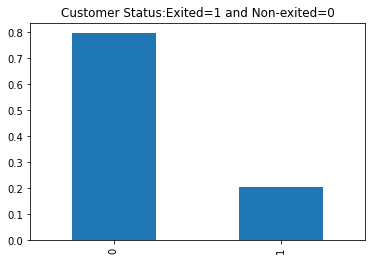

In [ ]:
#sns.displot(data_new["Exited"],kde=False,bins=2)
data_new.Exited.value_counts(normalize=True).plot(kind = 'bar', title = 'Customer Status:Exited=1 and Non-exited=0')

<Figure size 1440x7200 with 0 Axes>

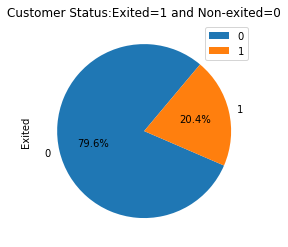

In [ ]:
plt.figure(figsize=(20,100))
pie_MS_M=pd.DataFrame(data_new['Exited'].value_counts())
pie_MS_M.plot.pie(subplots=True,labels=pie_MS_M.index.values,autopct='%1.1f%%',startangle=50)
plt.title('Customer Status:Exited=1 and Non-exited=0')
plt.show()

### 20.4% of the data is of those customers who left the bank and 79.6% data is of those customers who are still the customer of the bank which shows that the data is unbalance 

# Bivariant Analysis

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

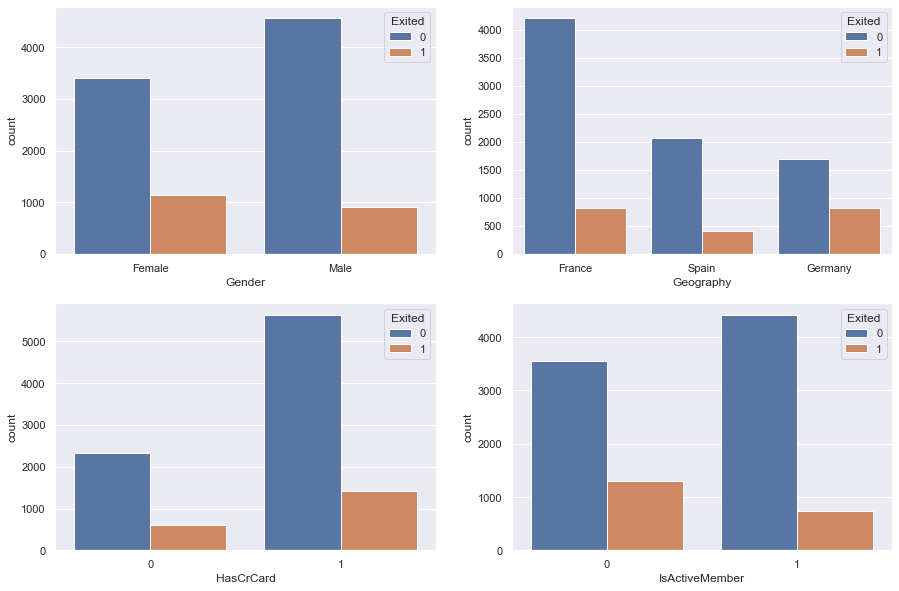

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
sns.countplot(x="Gender", hue='Exited', data=data_new)
plt.subplot(222)
sns.countplot(x="Geography", hue='Exited', data=data_new)
plt.subplot(223)
sns.countplot(x="HasCrCard", hue='Exited', data=data_new)
plt.subplot(224)
sns.countplot(x="IsActiveMember", hue='Exited', data=data_new)

## Insights :
* **Female** ustomers have slightly high chance of leaving the bank as compared to **male** customers.
* Customers from **France** has high rate of leaving the bank as compared to customers from **Spain** and **Germany**.
* There is not a substantial difference between customers with credit card and customers with no credit card leaving rates
* There is no substantial difference active_memeber and non-active_members leaving rates.

## Correlation Matrix
Creating a correlation matrix is a technique to identify multicollinearity among numerical variables. In Python, this can be created using the **corr()** function
* -1 indicates a perfectly negative linear correlation between two variables.

* 0 indicates no linear correlation between two variables.

* 1 indicates a perfectly positive linear correlation between two variables.

<AxesSubplot:>

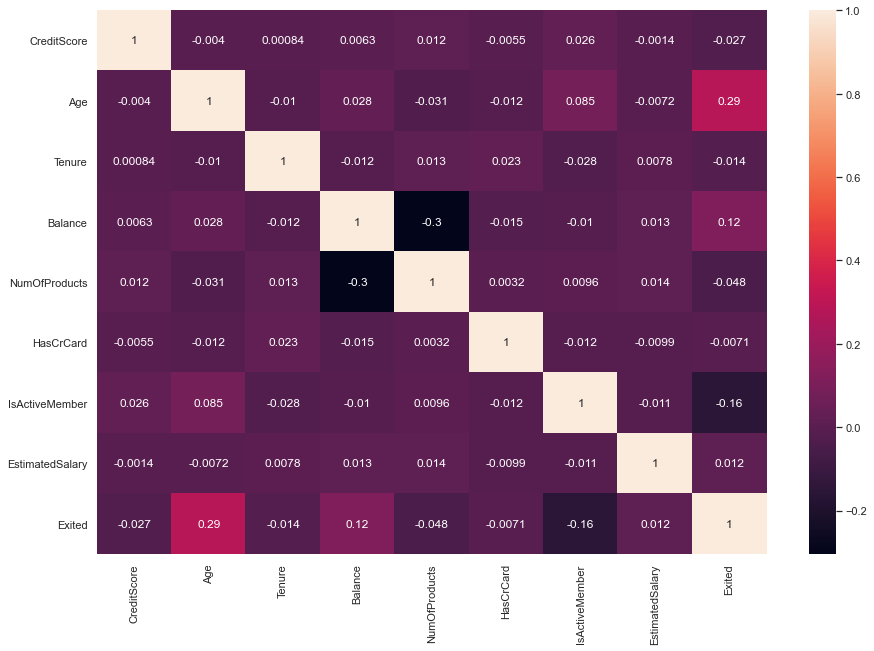

In [ ]:
#data_n=data_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited']]
correlation=data_new.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns
           ,annot=True)

## Insight
* **Age** adn **Balance** has positive Correlataion with wether the customers will **Exit** the bank or not which means the **Aged Customers** has greater chance of leaving the bank as compared to younger customers and Similarly the customers with more **Balance** in his/her account Exited as compare with low balance account holder.

* The Customers whose are Active has less chance of leaving the bank as because negative correlation with wether the customers will **Exit** the bank or not.

* The correlation between **Exited** and **CreditScore**,**tenure**,**HasCredit** and **EstimatedSalary** has no linear Correlation as the correlation value between them is approximately equal to 0.

## Boxplot(Bivariant Analysis)

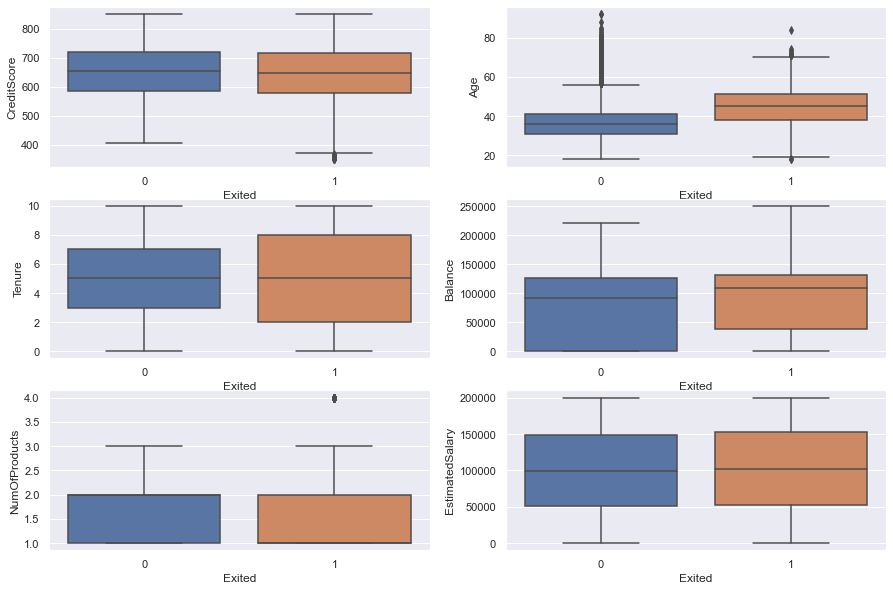

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(321)
sns.boxplot(x='Exited', y='CreditScore', data=data_new)
plt.subplot(322)
sns.boxplot(x='Exited', y='Age', data=data_new)
plt.subplot(323)
sns.boxplot(x='Exited', y='Tenure', data=data_new)
plt.subplot(324)
sns.boxplot(x='Exited', y='Balance', data=data_new)
plt.subplot(325)
sns.boxplot(x='Exited', y='NumOfProducts', data=data_new)
plt.subplot(326)
sns.boxplot(x='Exited', y='EstimatedSalary', data=data_new)
plt.show()

## Insight 
* Customers whose **Age** is more the **40** hase Exited the bank more often as compared the customers whose **Age** is below 40
* Customer whose **Tenure** is less than 3 times and greater than 7 times has greater chances of Exiting the bank and between these two value there is equal chances of wether the customer will exit the bank or not.
* From the plot we can see clearly tht the customers whose **Account balance** is less 40,000 has lesser chances of exiting the bank. and there are equal number of **Exited** and **Non_Exited** customers with **Account balance** more than 40,000

**Note:** There are some **Outliers** in the Age Feature.

# Data Preprocessing
Prepare the data

## Duplicate observations check

In [ ]:
# Checking for duplicates and dropping the entire duplicate row if any
data_no_duplicate=data_new.copy()
data_no_duplicate.drop_duplicates(subset=None, inplace=True)

In [ ]:
data_no_duplicate.shape

(10000, 11)

### The shape after running the drop duplicate command is same as the original dataframe.

### These is no duplicate in the Dataset

## Missing Value Treatment
Remove all the rows which NAN attributes

In [ ]:
# Checking Null rows or coloum
null_data = data_new[data_new.isnull().any(axis=1)]

In [ ]:
#data_new.fillna(0)

In [ ]:
null_data.sum()

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### There are no missing / Null values either in columns or rows

## Remove Outliers from **Age** using **Percentile Method**

In [ ]:
Q3=data_new['Age'].quantile(0.75)
Q1=data_new['Age'].quantile(0.25)
IQR = Q3-Q1

In [ ]:
# setting maximum and mimum  threshold value
min_threshold = Q1-(1.5*IQR)
max_threshold= Q3+(1.5*IQR)
data_no_outliers=data_new[(data_new.Age<max_threshold) & (data_new.Age>min_threshold)]
data_no_outliers.shape

(9589, 11)

### There were 411 outliers in the AGE Feature

## Split the target variable and predictors 

In [ ]:
target_variable=data_no_outliers[['Exited']]
predictors=data_no_outliers.drop("Exited", axis=1)

In [ ]:
predictors.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
target_variable.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Data Rescaling
Deep learning neural network models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the domain may be different for each variable.

Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. 

## One-Hot Encoding

In [ ]:
predictors=pd.get_dummies(predictors)
target_variable=pd.get_dummies(target_variable)

# Drummy Variable Trap
The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

In [ ]:
predictors.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


### We will drop 'Geography_Germany','Gender_Female' in order to avoid Dummy Variable Trap

In [ ]:
predictors=predictors.drop(['Geography_Germany','Gender_Female'],axis=1)

In [ ]:
predictors.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## **Min-Max Scaling**, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.In our case it's [0,1]

In [ ]:
scaled = preprocessing.MinMaxScaler()
Predictors=scaled.fit_transform(predictors)
target_variable=scaled.fit_transform(target_variable)

In [ ]:
Predictors

array([[0.538     , 0.55813953, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.516     , 0.53488372, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.304     , 0.55813953, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.41860465, 0.7       , ..., 1.        , 0.        ,
        0.        ],
       [0.844     , 0.55813953, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.884     , 0.23255814, 0.4       , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
 #Converting Array to Pandas DataFrame
predictors=pd.DataFrame(Predictors,columns=["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard", "IsActiveMember","EstimatedSalary","Geography_France","Geography_Spain","Gender_Male"])

In [ ]:
predictors.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Male
0,0.538,0.558140,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,0.534884,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.558140,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,0.488372,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000,0.581395,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0


In [ ]:
target_variable=scaled.fit_transform(target_variable)

In [ ]:
#  Converting Array to Pandas DataFrame
#target_variable=pd.DataFrame(target_variable,columns=["Exited"])
target_variable

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

## Split the Data into 80% train data and 20% Validation Data 

In [ ]:
(X_train,X_valid,Y_train,Y_valid)=train_test_split(Predictors,target_variable,test_size=0.2,random_state=42) 

In [ ]:
print("X_train shape {}, Y_train shape {},X_Valid shape {}, Y_valid {}.".format(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape))

X_train shape (7671, 11), Y_train shape (7671, 1),X_Valid shape (1918, 11), Y_valid (1918, 1).


# Neural Network Model using **Keras**

In [ ]:
model= Sequential()
model.add(Dense(units=20,activation='relu',input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 27)                567       
                                                                 
 dropout_1 (Dropout)         (None, 27)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 196       
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 27)                2

### There 90,241 trainable parameters

## Model Compilation

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()])

In [ ]:
History=model.fit(X_train,Y_train,epochs=200,batch_size=16,verbose=1)

Epoch 1/200
480/480 [==============================] - 6s 5ms/step - loss: 0.5050 - auc: 0.5716
Epoch 2/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4663 - auc: 0.6987
Epoch 3/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4528 - auc: 0.7270
Epoch 4/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4451 - auc: 0.7404
Epoch 5/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4439 - auc: 0.7400
Epoch 6/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4366 - auc: 0.7484
Epoch 7/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4356 - auc: 0.7521
Epoch 8/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4280 - auc: 0.7608
Epoch 9/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4260 - auc: 0.7642
Epoch 10/200
480/480 [==============================] - 2s 5ms/step - loss: 0.4254 - auc: 0.7648
Epoch 11/200
480/480 [=================

# Model Prediction

In [ ]:
y_pred=model.predict(X_valid)

60/60 [==============================] - 0s 2ms/step


## Classification Metrics
* Accuracy.
* ROC, AUC.
* Confusion Matrix.
* Classification Report.

# Note:
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

**Classification Accuracy** is almost universally inappropriate for **imbalanced classification**. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class..

**In our case the Data is imbalance as number of non-exited customer data is more that than exited customers, so we cannot evaluate our model by using accuracy metric**

For imbalanced classification problems, the majority class is typically referred to as the negative outcome (e.g. such as “no change” or “negative test result“), and the minority class is typically referred to as the positive outcome (e.g. “change” or “positive test result“).

**Majority Class**: Negative outcome, **Non-Exited Customer**.

**Minority Class**: Positive outcome, **Exited Customer**.

# ROC curve
AUC, or Area Under Curve, is a metric for binary classification.
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate



# AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes.

AUC of 0.5 suggests no **Discrimination** (i.e., ability to predict Exited customers amd Non-Exited Customer), 0.7 to 0.8 is considered **Acceptable**, 0.8 to 0.9 is considered **Excellent**, and more than 0.9 is considered **Outstanding**.

**ROC AUC = ROC Area Under Curve**

**The ROC Curve and ROC AUC can be optimistic under a severe class imbalance, especially when the number of examples in the minority class is small.**

That's why we will use **ROC AUC metric** for Evaluation of model performance

## Optimal Threshold Value
The optimal threshold is often defined as the value that best separates the customers relative to be Exited and non-Exited ; i.e., the value that maximizes the sum of sensitivity plus specificity (also called the Youden index).

To deal with the imbalanced class, threshold moving is proposed as the alternative to handling the imbalanced. Generating the synthetic observation or resample a certain data, theoretically, has its own risk, like create a new observation actually doesn’t appear in the data, decrease the valuable information of the data itself or create a flood of information.

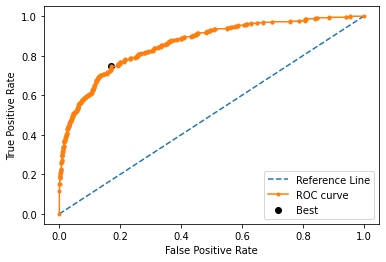

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_valid, y_pred)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Reference Line')
pyplot.plot(fpr, tpr, marker='.', label='ROC curve')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The **Geometric Mean or G-Mean** is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

**G-Mean = sqrt(Sensitivity * Specificity)**

In [ ]:
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.315791, G-Mean=0.787


# Confusion Matrix
Most threshold metrics can be best understood by the terms used in a confusion matrix for a binary (two-class) classification problem. This does not mean that the metrics are limited for use on binary classification; it is just an easy way to quickly understand what is being measured.

The confusion matrix provides more insight into not only the performance of a predictive model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.

In [ ]:
y_pr=[]
#_pr = [int(round(x[0])) for x in y_pred]
for i,x in enumerate(y_pred):
    if x<thresholds[ix]:
        y_pr.append(0)
    elif x>=thresholds[ix]:
        y_pr.append(1)
cm=confusion_matrix(Y_valid,y_pr)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.rcParams["figure.figsize"] = (20,3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float'/cm.sum(axis=1))[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh=cm.max()/2
    for i,j in it.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Confusion matrix, without normalization
[[1265  259]
 [ 100  294]]


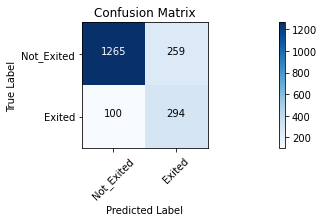

In [ ]:
cm_plot_label=['Not_Exited',"Exited"]
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

Model perform very well on predicting the **No_Exited Customer Class** as it predicted **1188** time correctly out of **1524** and for  **Exited Customers Class** the model predicted **315** times correctly out of **394** which is ver good.Now, we can rven improve the performance of model hyperparameter tuning.

# Classification_report
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score

**Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.

**Precision = TruePositive / (TruePositive + FalsePositive)**

**Recall** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

**Recall = TruePositive / (TruePositive + FalseNegative)**

Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.

**F-Measure = (2 * Precision * Recall) / (Precision + Recall)**

**The F-Measure is a popular metric for imbalanced classification.**

In [ ]:
print(classification_report(Y_valid,y_pr))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85      1524
         1.0       0.48      0.80      0.60       394

    accuracy                           0.78      1918
   macro avg       0.71      0.79      0.73      1918
weighted avg       0.84      0.78      0.80      1918



By Looking the Classification report we can see that the model perform very well on classifying the **Classe**. Now we will use **Hyperparameter tuning** to get the best optimal hyperparameter for our model and improve the performance of model.

# Hyperparameter Tuning of Model Optimizer
We’ll be tuning:

* The number of nodes in the first fully connected layer
* The number of nodes in the second fully connected layer
* The number of nodes in the third fully connected layer
* The number of nodes in the four fully connected layer
* The number of nodes in the five fully connected layer
* The number of nodes in the Six fully connected layer
* The number of nodes in the Sevem fully connected layer
* The number of nodes in the Eight fully connected layer
* The number of nodes in the Nine fully connected layer
* Optimizer
* Dropout rate
* Batch size
* Number of epochs to train for


In [ ]:
def base_model(optimizer='adam',hiddenLayerOne=20,hiddenLayerTwo=27,hiddenLayerThree=7,hiddenLayerfour=200,hiddenLayerfive=200,hiddenLayersix=100,hiddenlayerSeven=200,
               hiddenlayerEight=100,hiddenlayerNine=30,dropout=0.2):
    model= Sequential()
    model.add(Dense(hiddenLayerOne,activation='relu',input_shape=(11,)))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerTwo, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerThree, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerfour, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerfive, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayersix, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenlayerSeven, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(hiddenlayerEight, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenlayerNine, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=["accuracy"])
    return model

In [ ]:
# define a grid of the hyperparameter search space
hiddenLayerOne = [256, 512, 784]
hiddenLayerTwo = [128, 256, 512]
hiddenLayerThree = [64, 128, 256]
hiddenLayerfour = [32, 64, 128]
hiddenLayerfive = [16, 32, 64]
hiddenLayersix = [8, 16, 32]
hiddenlayerSeven=[32,64,128]
hiddenlayerEight=[32,64,64]
hiddenlayerNine=[8,16,32]
#learnRate = [1,1e-2, 1e-3, 1e-4]
dropout = [0.1,0.3, 0.4, 0.5]
batchSize = [4, 8, 16, 32]
epochs = [10, 20, 30, 100,200]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# create a dictionary from the hyperparameter grid
grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    hiddenLayerTwo=hiddenLayerTwo,
    hiddenLayerThree=hiddenLayerThree,
    hiddenLayerfour=hiddenLayerfour,
    hiddenLayerfive=hiddenLayerfour,
    hiddenLayersix=hiddenLayersix,
    hiddenlayerSeven=hiddenlayerSeven,
    hiddenlayerEight=hiddenlayerEight,
    hiddenlayerNine=hiddenlayerNine,
    dropout=dropout,
    batch_size=batchSize,
    epochs=epochs,
    optimizer=optimizer
)

In [ ]:
model = KerasClassifier(build_fn=base_model, verbose=0)
print("Performing random search...")
searcher = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=3,param_distributions=grid, scoring="roc_auc")
#grabs the best_estimator_ from the randomized search.
searchResults = searcher.fit(X_train, Y_train)
# summarize grid search information
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("Best Score is {:.2f} using {}".format(bestScore,bestParams))

Performing random search...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Best Score is 0.85 using {'optimizer': 'SGD', 'hiddenlayerSeven': 64, 'hiddenlayerNine': 32, 'hiddenlayerEight': 64, 'hiddenLayersix': 8, 'hiddenLayerfour': 128, 'hiddenLayerfive': 128, 'hiddenLayerTwo': 128, 'hiddenLayerThree': 128, 'hiddenLayerOne': 784, 'epochs': 100, 'dropout': 0.3, 'batch_size': 8}


# Final Model 

In [ ]:
model_final= Sequential()
model_final.add(Dense(512,activation='relu',input_shape=(11,)))
model_final.add(Dropout(0.4))
model_final.add(Dense(512, activation="relu"))
model_final.add(Dropout(0.4))
model_final.add(Dense(256, activation="relu"))
model_final.add(Dropout(0.4))
model_final.add(Dense(32, activation="relu"))
model_final.add(Dropout(0.4))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dropout(0.4))
model_final.add(Dense(8, activation='relu'))
model_final.add(Dropout(0.4))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dense(7, activation='relu'))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dropout(0.4))
model_final.add(Dense(16, activation='relu'))
model_final.add(Dropout(0.4))
model_final.add(Dense(units=1,activation='sigmoid'))

# Model Summary

In [ ]:
model_final.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               6144      
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_44 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)               

### There 410,992 trainable parameters

## Model Compilation

In [ ]:
model_final.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()])

In [ ]:
Hist=model_final.fit(X_train,Y_train,epochs=200,batch_size=16,verbose=1)

Epoch 1/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5329 - auc_4: 0.5720
Epoch 2/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4889 - auc_4: 0.6609
Epoch 3/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4767 - auc_4: 0.7083
Epoch 4/200
480/480 [==============================] - 1s 3ms/step - loss: 0.4707 - auc_4: 0.7120
Epoch 5/200
480/480 [==============================] - 1s 3ms/step - loss: 0.4554 - auc_4: 0.7490
Epoch 6/200
480/480 [==============================] - 1s 3ms/step - loss: 0.4533 - auc_4: 0.7594
Epoch 7/200
480/480 [==============================] - 2s 3ms/step - loss: 0.4393 - auc_4: 0.7763
Epoch 8/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4369 - auc_4: 0.7834
Epoch 9/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4398 - auc_4: 0.7910
Epoch 10/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4276 - auc_4: 0.7929
Epoch 11/200
480/48

In [ ]:
y_pred_f=model_final.predict(X_valid)

# AUC: Area Under the ROC Curve

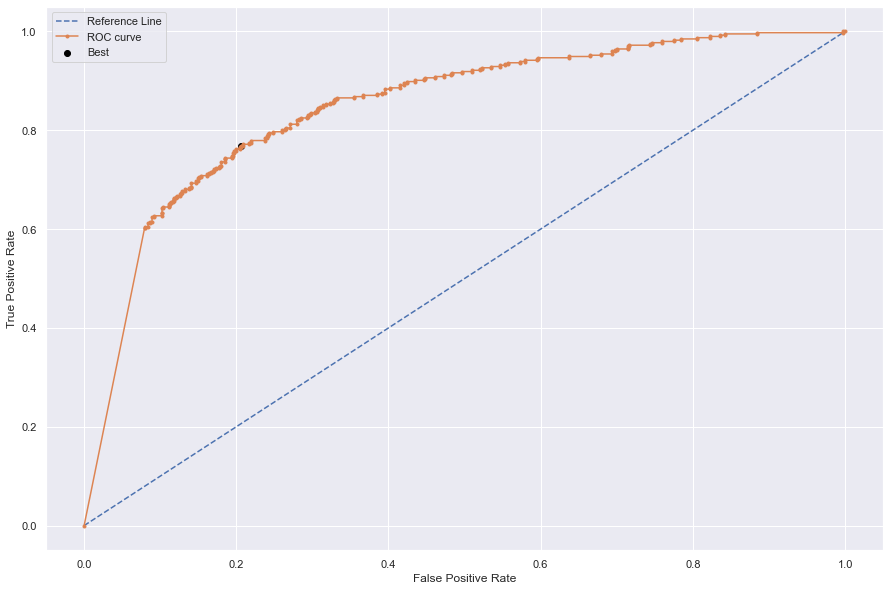

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_valid, y_pred_f)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Reference Line')
pyplot.plot(fpr, tpr, marker='.', label='ROC curve')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Best Optimal Threshold value
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.294269, G-Mean=0.781


# Confusion Matrix

In [ ]:
y_pr_f=[]
#_pr = [int(round(x[0])) for x in y_pred]
for i,x in enumerate(y_pred_f):
    if x<=thresholds[ix]:
        y_pr_f.append(0)
    elif x>thresholds[ix]:
        y_pr_f.append(1)

cm_f=confusion_matrix(Y_valid,y_pr_f)

Confusion matrix, without normalization
[[1209  315]
 [  92  302]]


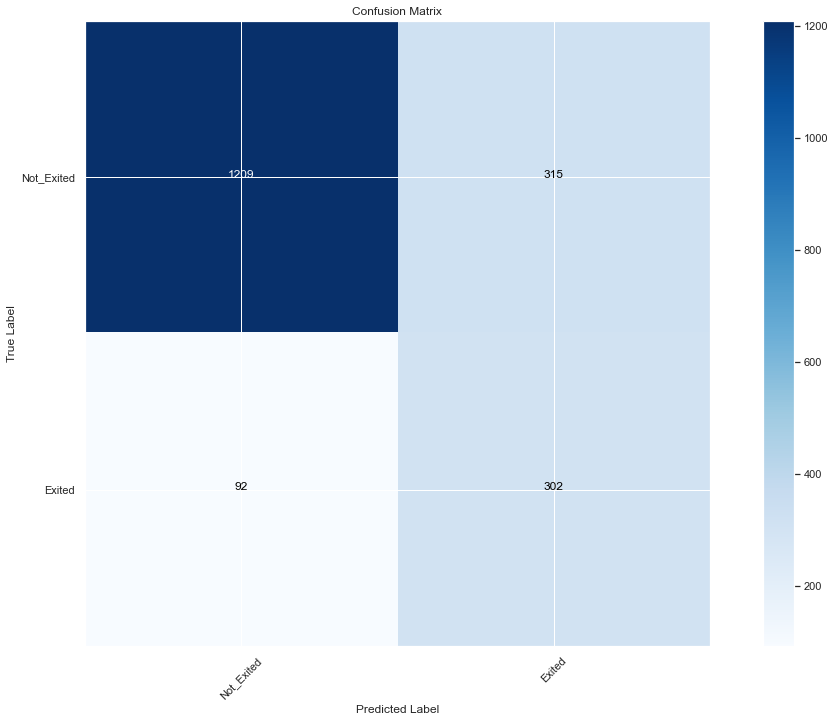

In [ ]:
cm_plot_label=['Not_Exited',"Exited"]
plot_confusion_matrix(cm_f,cm_plot_label,title='Confusion Matrix')

# Classification Report

In [ ]:
print(classification_report(Y_valid,y_pr_f))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      1524
         1.0       0.49      0.77      0.60       394

    accuracy                           0.79      1918
   macro avg       0.71      0.78      0.73      1918
weighted avg       0.84      0.79      0.80      1918



From the **Confusion metrics** and **Classification Report** we can see that the model perform very on Classifing the classes with High precision and recall. The recall for **Exited Class(Positive Class)** is **0.77** which shows the Positive class is predicted well enough.

## Model Evalution

In [ ]:
model_final.evaluate(X_valid,Y_valid)

60/60 [==============================] - 0s 932us/step - loss: 0.3808 - auc_5: 0.8503


[0.3807731568813324, 0.8503212928771973]

The model perform **Excellent** in Classifying the Customers Classes(Exited and Non_Exited) with **AUC=0.8503** which is very good auc_score for **Imbalance Data**.

**Scope of Improvement:** 
* The model performance can be improve by getting more data for training so that the model can explore more data during train and make it more robust while predicting an unseen data.
* The model performance can also be improve by Balancing Data. We can Balance the data By using either **Oversample** or **Undersample** methods. The reason why I didn't balance data because I want to learn how to tackle an Imbalance Data in train **Deep Neural Network**.

# Conclusion and Key Takeaways
* The France national Customers have more chances to leave the bank as compared to the othe two coutries
* The customers who will exit the bank in the next 6 month are mostly those customers whose are more than 40years old and those customers whose **Account balance** is less than 40,000 has never Exited the bank.
* **Deep Neural Network** perform very well on classifying the Customers wether they will Exit the bank or not but DNN required more data for traininig as compared to **traditional machine learning** algorithm which mean that **Computational Cost** of **Deep Neural Network** is more than **traditional machine learning** but performance of **Deep Neural Network** is far more better than **traditional machine learning**.
* Model fiind it difficulties to train on an **Imbalance Data** as it converge more toward Negative Class(Class with more Data) which was Non_Exited in our case and hard to predict the positive class(Exited) during evaluation.So, it is better to have Balance Data.  
* Hyperparameter tuning is **Computationally** very expensive but it help in finding the best parameters for your model.

### Test Query

In [ ]:
d={
    'CreditScore':[0],
   'Age':[0.538],
   'Tenure': [0.558140],
  'Balance': [0.2],
  'NumOfProducts': [0.21],
   'HasCrCard':[0.0],
   'IsActiveMember':[1.0],
   'EstimatedSalary':[0.2],
   'Geography_France':[0.0],
   'Geography_Spain':[0.0],
   'Gender_Male':[1.0]
   }
feature=np.array([[0.538,0.2,0.0,1.0,1.0,0.0,0.0]])
prediction=model.predict(feature)

In [ ]:
dat=pd.DataFrame(d)

In [ ]:
dat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Male
0,0,0.538,0.55814,0.2,0.21,0.0,1.0,0.2,0.0,0.0,1.0


In [ ]:
y=model.predict(dat)